<a href="https://colab.research.google.com/github/raznava/NN_architecture/blob/main/NN_architecture_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install kaleido

In [2]:
pip install optuna

In [3]:
import optuna
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_absolute_error
from optuna.visualization import plot_optimization_history, plot_param_importances
from optuna.visualization import plot_slice

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy.spatial.distance import pdist, squareform
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.cross_decomposition import PLSRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
from tensorflow.keras.regularizers import l1, l2, L1L2

from sklearn.pipeline import make_pipeline
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import PowerTransformer, FunctionTransformer
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.model_selection import cross_validate
import random


In [4]:
# Grant access to google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# Read the csv file
df = pd.read_csv('/content/drive/MyDrive/00_GIT/NN_Bayes_Architecture/curated-solubility-dataset.csv', sep=',', encoding='latin1')

In [ ]:
df.head()

,ID,Name,InChI,InChIKey,SMILES,Solubility,SD,Ocurrences,Group,MolWt,...,NumRotatableBonds,NumValenceElectrons,NumAromaticRings,NumSaturatedRings,NumAliphaticRings,RingCount,TPSA,LabuteASA,BalabanJ,BertzCT
0,A-3,"N,N,N-trimethyloctadecan-1-aminium bromide",InChI=1S/C21H46N.BrH/c1-5-6-7-8-9-10-11-12-13-...,SZEMGTQCPRNXEG-UHFFFAOYSA-M,[Br-].CCCCCCCCCCCCCCCCCC[N+](C)(C)C,-3.616127,0.0,1,G1,392.510,...,17.0,142.0,0.0,0.0,0.0,0.0,0.00,158.520601,0.000000e+00,210.377334
1,A-4,Benzo[cd]indol-2(1H)-one,InChI=1S/C11H7NO/c13-11-8-5-1-3-7-4-2-6-9(12-1...,GPYLCFQEKPUWLD-UHFFFAOYSA-N,O=C1Nc2cccc3cccc1c23,-3.254767,0.0,1,G1,169.183,...,0.0,62.0,2.0,0.0,1.0,3.0,29.10,75.183563,2.582996e+00,511.229248
2,A-5,4-chlorobenzaldehyde,InChI=1S/C7H5ClO/c8-7-3-1-6(5-9)2-4-7/h1-5H,AVPYQKSLYISFPO-UHFFFAOYSA-N,Clc1ccc(C=O)cc1,-2.177078,0.0,1,G1,140.569,...,1.0,46.0,1.0,0.0,0.0,1.0,17.07,58.261134,3.009782e+00,202.661065
3,A-8,"zinc bis[2-hydroxy-3,5-bis(1-phenylethyl)benzo...",InChI=1S/2C23H22O3.Zn/c2*1-15(17-9-5-3-6-10-17...,XTUPUYCJWKHGSW-UHFFFAOYSA-L,[Zn++].CC(c1ccccc1)c2cc(C(C)c3ccccc3)c(O)c(c2)...,-3.924409,0.0,1,G1,756.226,...,10.0,264.0,6.0,0.0,0.0,6.0,120.72,323.755434,2.322963e-07,1964.648666
4,A-9,4-({4-[bis(oxiran-2-ylmethyl)amino]phenyl}meth...,InChI=1S/C25H30N2O4/c1-5-20(26(10-22-14-28-22)...,FAUAZXVRLVIARB-UHFFFAOYSA-N,C1OC1CN(CC2CO2)c3ccc(Cc4ccc(cc4)N(CC5CO5)CC6CO...,-4.662065,0.0,1,G1,422.525,...,12.0,164.0,2.0,4.0,4.0,6.0,56.60,183.183268,1.084427e+00,769.899934


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Solubility,9982.0,-2.889909,2.368154,-13.171900,-4.326325,-2.618173,-1.209735,2.137682
SD,9982.0,0.067449,0.234702,0.000000,0.000000,0.000000,0.000000,3.870145
Ocurrences,9982.0,1.378081,1.023476,1.000000,1.000000,1.000000,1.000000,38.000000
MolWt,9982.0,266.665946,184.179024,9.012000,162.276000,228.682000,320.436000,5299.456000
MolLogP,9982.0,1.979167,3.517738,-40.873200,0.619750,1.949220,3.419030,68.541140
MolMR,9982.0,66.794594,46.523021,0.000000,40.602475,58.633400,81.938000,1419.351700
HeavyAtomCount,9982.0,17.374674,12.241536,1.000000,11.000000,15.000000,21.000000,388.000000
NumHAcceptors,9982.0,3.486776,3.498203,0.000000,2.000000,3.000000,4.000000,86.000000
NumHDonors,9982.0,1.108595,1.488973,0.000000,0.000000,1.000000,2.000000,26.000000
NumHeteroatoms,9982.0,5.196955,4.736275,0.000000,3.000000,4.000000,6.000000,89.000000


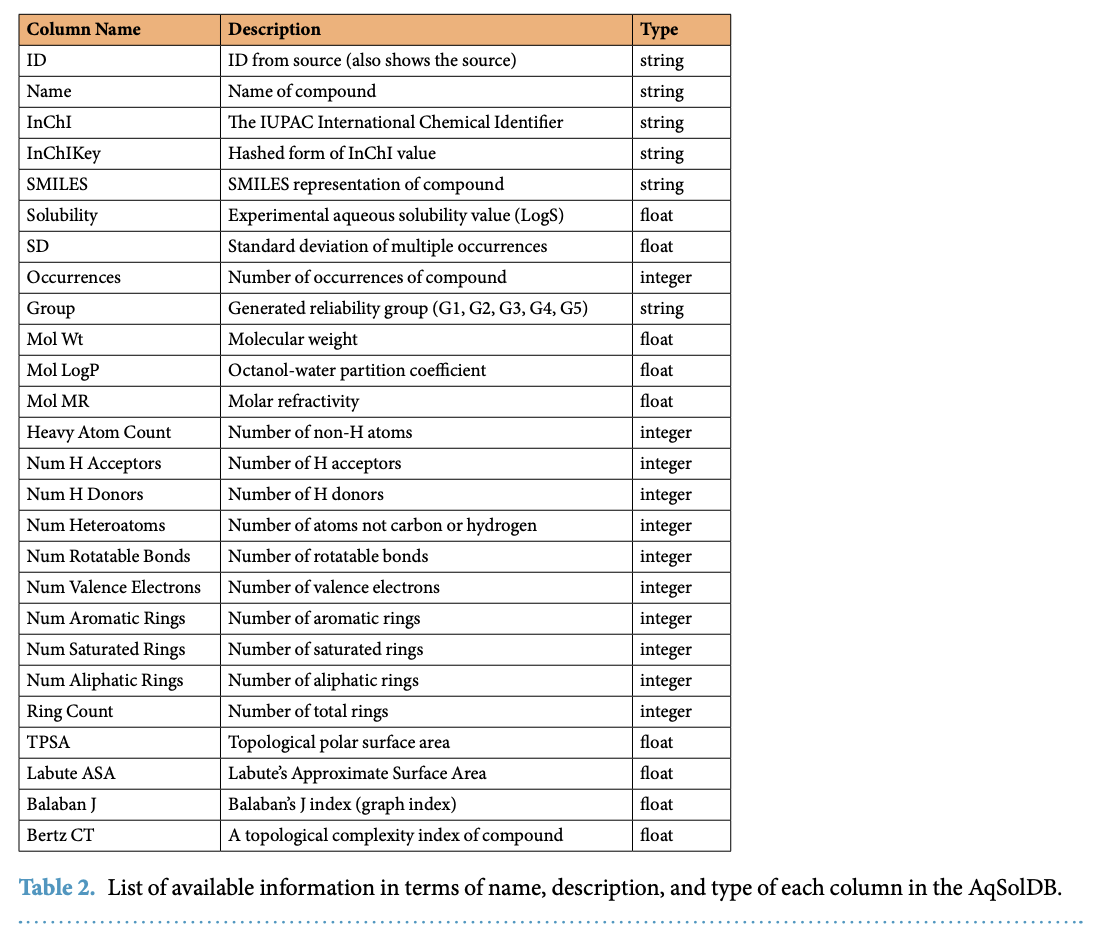

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9982 entries, 0 to 9981
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   9982 non-null   object 
 1   Name                 9982 non-null   object 
 2   InChI                9982 non-null   object 
 3   InChIKey             9982 non-null   object 
 4   SMILES               9982 non-null   object 
 5   Solubility           9982 non-null   float64
 6   SD                   9982 non-null   float64
 7   Ocurrences           9982 non-null   int64  
 8   Group                9982 non-null   object 
 9   MolWt                9982 non-null   float64
 10  MolLogP              9982 non-null   float64
 11  MolMR                9982 non-null   float64
 12  HeavyAtomCount       9982 non-null   float64
 13  NumHAcceptors        9982 non-null   float64
 14  NumHDonors           9982 non-null   float64
 15  NumHeteroatoms       9982 non-null   f

In [6]:
# Set seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)
random.seed(42)

In [7]:
# Name of the model
model_name = "NN_Yeo"
# Number of trials
trial_number_n = 200


In [8]:
# Assign the data to X and y
X = df.drop(['ID', 'Name', 'InChI', 'InChIKey', 'SMILES', 'Solubility', 'Group'], axis=1)
y = df['Solubility']

In [9]:
# Split into train, cal, and test sets
X_train_cal_2_1, X_test, y_train_cal_2_1, y_test = train_test_split(X, y, test_size=998, random_state=1)
X_train_cal2, X_cal1, y_train_cal2, y_cal1 = train_test_split(X_train_cal_2_1, y_train_cal_2_1, test_size=998, random_state=1)
X_train, X_cal2, y_train, y_cal2 = train_test_split(X_train_cal2, y_train_cal2, test_size=998, random_state=1)


In [10]:
list = [X_train, X_test, X_cal1, X_cal2, y_train, y_test, y_cal1, y_cal2]
for i in list:
  print (i.shape)

(6988, 19)
(998, 19)
(998, 19)
(998, 19)
(6988,)
(998,)
(998,)
(998,)


In [11]:
# Transform the X_train_scaled_MnMx, X_test_scaled_MnMx, and X_cal_scaled_MnMx using PowerTransformer
transformer_obj = PowerTransformer(method='yeo-johnson')
transformer_obj.fit(X_train)

X_train_transformed = transformer_obj.transform(X_train)
X_test_transformed = transformer_obj.transform(X_test)
X_cal1_transformed = transformer_obj.transform(X_cal1)
X_cal2_transformed = transformer_obj.transform(X_cal2)

In [12]:
# Normalize the data. Fit on X_train_scaled_MnMx to avoid data leakage
scaler01 = MinMaxScaler(feature_range=(0,1))
scaler01.fit(X_train_transformed)
X_train_scaled_MnMx = scaler01.transform(X_train_transformed)
X_test_scaled_MnMx = scaler01.transform(X_test_transformed)
X_cal1_scaled_MnMx = scaler01.transform(X_cal1_transformed)
X_cal2_scaled_MnMx = scaler01.transform(X_cal2_transformed)

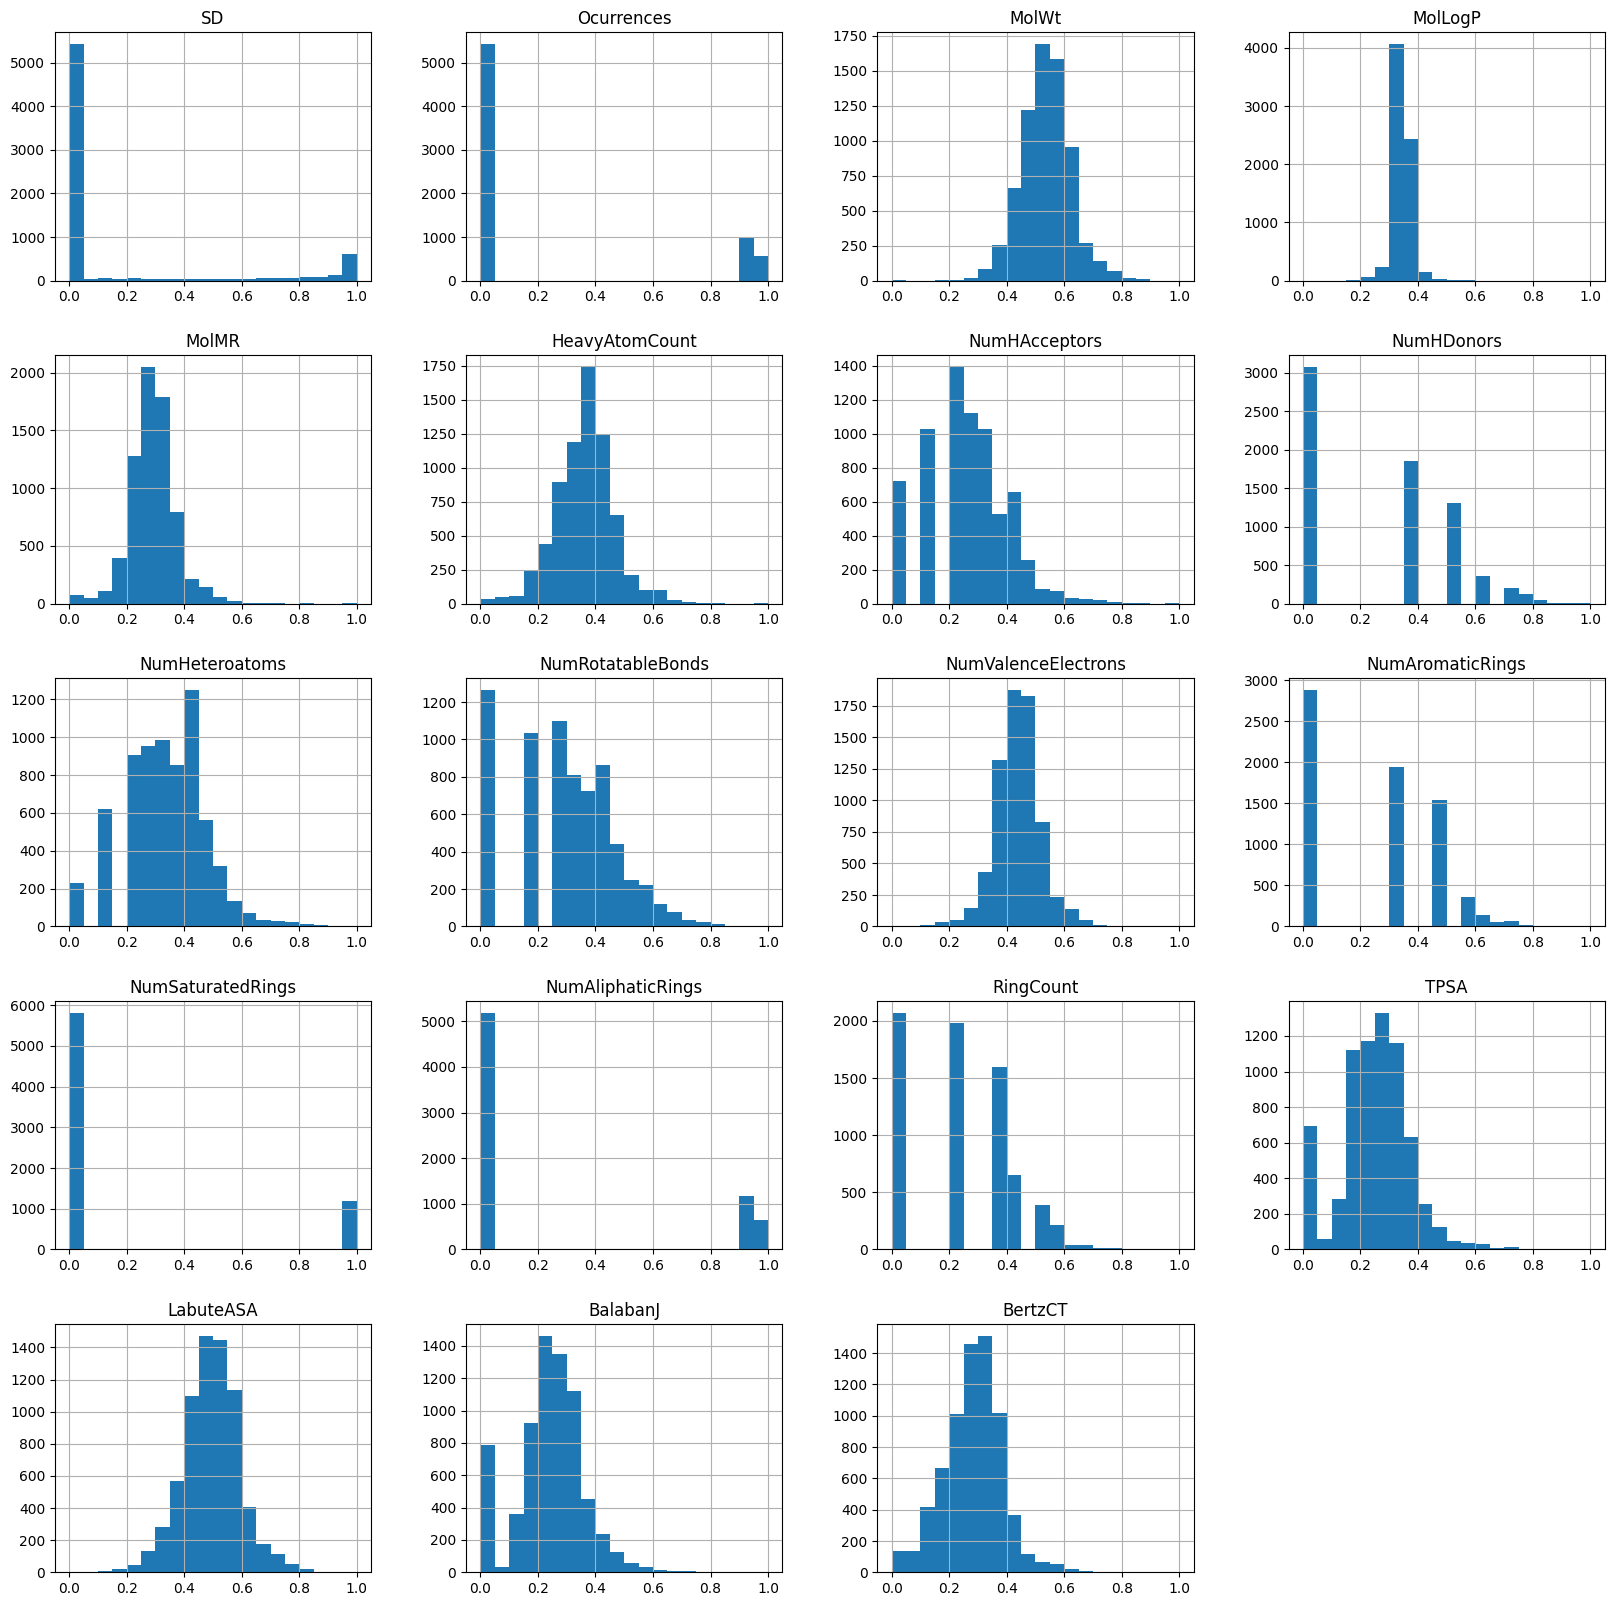

In [ ]:
df_X_train_scaled_MnMx = pd.DataFrame(X_train_scaled_MnMx, columns=X_train.columns)
df_X_train_scaled_MnMx.hist(figsize=(20,20), bins=20);

In [ ]:
# Set the pat where all the figures will be saved
path_to_save = '/content/drive/MyDrive/00_GIT/NN_Bayes_Architecture/'

# Define the Neural Network Architecture and Objective Function
def objective(trial):
    # Hyperparameters to be optimized
    batch_size = trial.suggest_int('batch_size', 16, 256)
    epochs_n = trial.suggest_int('epochs', 100, 100)
    n_layers = trial.suggest_int('n_layers', 1, 5)
    dropout_rate = trial.suggest_float('dropout_rate', 0.0, 0.5)
    l1_reg = trial.suggest_float('l1_reg', 1e-5, 1e-1, log=True)  # L1 regularization hyperparameter
    l2_reg = trial.suggest_float('l2_reg', 1e-5, 1e-1, log=True)  # L2 regularization hyperparameter

    # Neural Network Architecture with L1 and L2 Regularization
    model = Sequential()
    for i in range(n_layers):
        num_neurons = trial.suggest_int(f'n_neurons_l{i}', 4, 256)
        if i == 0:
            model.add(Dense(num_neurons, activation='relu', input_shape=(X_train_scaled_MnMx.shape[1],), kernel_regularizer=L1L2(l1=l1_reg, l2=l2_reg)))
        else:
            model.add(Dense(num_neurons, activation='relu', kernel_regularizer=L1L2(l1=l1_reg, l2=l2_reg)))
        model.add(Dropout(dropout_rate))
    model.add(Dense(1, kernel_regularizer=L1L2(l1=l1_reg, l2=l2_reg)))  # Adding L1 and L2 regularization to the output layer as well


    # Compile the model
    learning_rate = trial.suggest_float('learning_rate', 1e-5, 1e-1, log=True)
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mean_absolute_error')

    # Train the model on the training data
    model.fit(X_train_scaled_MnMx, y_train, batch_size=batch_size, epochs=epochs_n, verbose=0)

    # Predict on calibration data
    y_pred = model.predict(X_cal1_scaled_MnMx, verbose=0)

    # Calculate the MAE on the inversely transformed values
    mae = mean_absolute_error(y_cal1, y_pred)

    return mae

# Early stopping callback
class EarlyStoppingCallback(object):
    def __init__(self, threshold, n_trials):
        self.threshold = threshold
        self.n_trials = n_trials
        self.best_value = np.inf
        self.trials_since_improvement = 0

    def __call__(self, study, trial):
        if study.best_value < self.best_value:
            self.best_value = study.best_value
            self.trials_since_improvement = 0
        else:
            self.trials_since_improvement += 1

        if self.trials_since_improvement >= self.n_trials:
            study.stop()

# Specify the threshold for improvement and the number of trials to check for improvement
# if n_trials (1000) is set to be higher than trial_number_n (200) early_stopping won't activate
early_stopping = EarlyStoppingCallback(threshold=0.0001, n_trials=1000)
# Set a seed for reproducibility
sampler_seed_value = optuna.samplers.TPESampler(seed=42)
# Optimization with Optuna with early stopping callback
study = optuna.create_study(direction='minimize', sampler=sampler_seed_value)
study.optimize(objective, n_trials=trial_number_n, callbacks=[early_stopping])

# Best Hyperparameters
print("Best hyperparameters: ", study.best_params)


[I 2024-03-15 13:18:21,912] A new study created in memory with name: no-name-2eb8b59f-fb5b-46f3-8f36-54ece358c641


In [ ]:
# Create the optimization history plot
fig = plot_optimization_history(study)

# Set the title of the plot
fig.update_layout(title=f'{model_name} Optimization History')

# Update the y-axis label
fig.update_layout(yaxis_title='Mean Absolute Error (MAE)')

# Show the plot
fig.show()

# save the plot
fig.write_image(f'{path_to_save}{model_name}_Opt_plot.png', width=800, height=600, scale=3)



In [26]:
from PIL import Image
import matplotlib.pyplot as plt

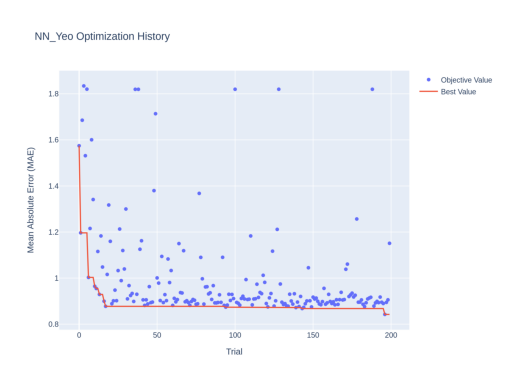

In [28]:
path_to_save = '/content/drive/MyDrive/00_GIT/NN_Bayes_Architecture/'
model_name = "NN_Yeo"
image_path = f'{path_to_save}{model_name}_Opt_plot.png'
# Load the image
image = Image.open(image_path)
# Display the image
plt.imshow(image)
plt.axis('off') # Hide axis
plt.show()

In [ ]:
# Visualize the importance of hyperparameters
# Create the optimization history plot
fig = plot_param_importances(study)
# Set the title of the plot
fig.update_layout(title=f'{model_name} Hyperparameter Importances')
# Show the plot
fig.show()
# Write the plot to a file
fig.write_image(f'{path_to_save}{model_name}_Hyp_plot.png', width=800, height=600, scale=3)


In [ ]:
plots = plot_slice(study)
plots.update_layout(yaxis_title='Mean Absolute Error (MAE)',
                    title=f"{model_name} Hyperparameter Impact on MAE")
plots.write_image(f'{path_to_save}{model_name}_Imp_plot.png', width=7200, height=600, scale=3)
plots.show()

In [ ]:
y_train

7875   -2.630000
8286   -2.680000
7406   -3.910000
8625   -2.369000
7553   -6.690000
          ...   
6032   -1.615400
7263   -1.060000
3032   -5.239735
4142   -2.910100
8867   -5.590000
Name: Solubility, Length: 6988, dtype: float64

In [ ]:
# Convert the transformed data into a DataFrame
X_train_scaled_MnMx = pd.DataFrame(X_train_scaled_MnMx, index=X_train.index, columns=X_train.columns)
X_test_scaled_MnMx = pd.DataFrame(X_test_scaled_MnMx, index=X_test.index, columns=X_test.columns)
y_train = pd.DataFrame(y_train, index=y_train.index, columns=['Solubility'])
y_test = pd.DataFrame(y_test, index=y_test.index, columns=['Solubility'])


In [ ]:

#Train and Evaluate the Final Model
def create_model(best_params):
    model = Sequential()
    n_layers = best_params['n_layers']
    for i in range(n_layers):
        num_neurons = best_params[f'n_neurons_l{i}']
        if i == 0:
            model.add(Dense(num_neurons, activation='relu', input_shape=(X_train.shape[1],)))
        else:
            model.add(Dense(num_neurons, activation='relu'))
        model.add(Dropout(best_params['dropout_rate']))

    model.add(Dense(1))  # Output layer
    model.compile(optimizer=Adam(learning_rate=best_params['learning_rate']), loss='mean_absolute_error')
    return model

best_params = study.best_params
model= create_model(best_params)
print(study.best_params)

{'batch_size': 201, 'epochs': 100, 'n_layers': 4, 'dropout_rate': 0.0006789648505518622, 'l1_reg': 1.4240386765918096e-05, 'l2_reg': 4.798348235889188e-05, 'n_neurons_l0': 130, 'n_neurons_l1': 132, 'n_neurons_l2': 150, 'n_neurons_l3': 245, 'learning_rate': 0.0011650861544646592}


In [ ]:
# Set batch_size and epochs
print(model_name)
layers_n = best_params.get('n_layers')
print(f'Layers:{layers_n}')
batch_size_n = best_params.get('batch_size')
print(f'Batch_size:{batch_size_n}')
epochs_n = best_params.get('epochs')
print(f'Epochs:{epochs_n}')
learning_rate_n = best_params.get('learning_rate')
print(f'Learning_rate:{learning_rate_n}')
dropout_rate_n = best_params.get('dropout_rate')
print(f'Dropout_rate:{dropout_rate_n}')

NN_Yeo
Layers:4
Batch_size:201
Epochs:100
Learning_rate:0.0011650861544646592
Dropout_rate:0.0006789648505518622


In [ ]:
model.save(f'{path_to_save}{model_name}_epochs_{epochs_n}', save_format='tf')

In [13]:
# Set the pat where all the figures will be saved
path_to_save = '/content/drive/MyDrive/00_GIT/NN_Bayes_Architecture/'
epochs_n = 100
batch_size_n = 201
# Load the model from the file
model = load_model(f'{path_to_save}{model_name}_epochs_{epochs_n}')

In [14]:
model.summary()

Model: "sequential_200"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1008 (Dense)          (None, 130)               2600      
                                                                 
 dropout_808 (Dropout)       (None, 130)               0         
                                                                 
 dense_1009 (Dense)          (None, 132)               17292     
                                                                 
 dropout_809 (Dropout)       (None, 132)               0         
                                                                 
 dense_1010 (Dense)          (None, 150)               19950     
                                                                 
 dropout_810 (Dropout)       (None, 150)               0         
                                                                 
 dense_1011 (Dense)          (None, 245)            

In [ ]:
# Fit the model with scaled target
model.fit(X_train_scaled_MnMx, y_train, batch_size=batch_size_n, epochs=epochs_n, verbose=0)

In [ ]:
model.save(f'{path_to_save}{model_name}_epochs_{epochs_n}', save_format='tf')

In [15]:
# Load the model from the file
epochs_n = 100
path_to_save = '/content/drive/MyDrive/00_GIT/NN_Bayes_Architecture/'
model = load_model(f'{path_to_save}{model_name}_epochs_{epochs_n}')

In [16]:
import os
os.chdir('/content/drive/MyDrive/00_GIT/NN_Bayes_Architecture/')
from ML_graph_tools import pred_plot

219/219 [==============================] - 0s 1ms/step
0.7005,
0.8000,
1.2863,
1.0606,
0.8901,
0.7094,
1.2789


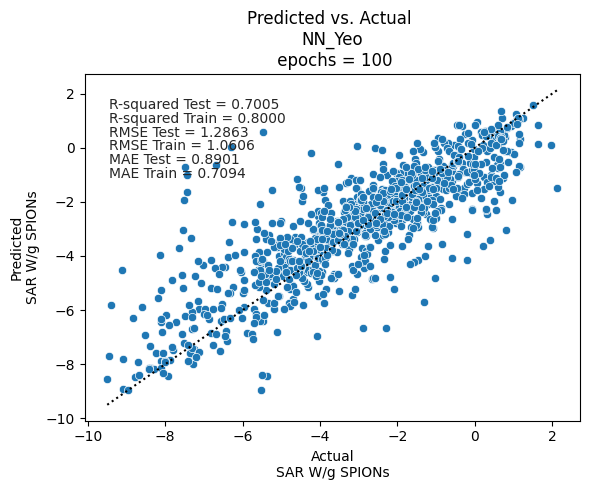

In [17]:


x_axis_label = 'Actual\nSAR W/g SPIONs'
y_axis_label = 'Predicted\nSAR W/g SPIONs'
path_to_save= '/content/drive/MyDrive/00_GIT/NN_Bayes_Architecture/'

pred_plot(model, X_test_scaled_MnMx, X_train_scaled_MnMx,
              y_test, y_train, y_axis_label, x_axis_label, model_name, epochs_n,
              path_to_save)

In [ ]:
# Load the initial model from the file
epochs_n =100
path_to_save = '/content/drive/MyDrive/00_GIT/NN_Bayes_Architecture/'
model = load_model(f'{path_to_save}{model_name}_epochs_{epochs_n}')

In [ ]:

model.fit(x=X_train_scaled_MnMx,y=y_train.values,
          validation_data=(X_cal1_scaled_MnMx,y_cal1.values),
          batch_size=batch_size_n,epochs=500, verbose=1)

Epoch 1/500
35/35 [==============================] - 2s 9ms/step - loss: 0.8381 - val_loss: 0.8767
Epoch 2/500
35/35 [==============================] - 0s 4ms/step - loss: 0.7074 - val_loss: 0.8560
Epoch 3/500
35/35 [==============================] - 0s 5ms/step - loss: 0.7089 - val_loss: 0.8922
Epoch 4/500
35/35 [==============================] - 0s 4ms/step - loss: 0.7185 - val_loss: 0.8619
Epoch 5/500
35/35 [==============================] - 0s 4ms/step - loss: 0.7063 - val_loss: 0.8646
Epoch 6/500
35/35 [==============================] - 0s 4ms/step - loss: 0.7065 - val_loss: 0.9096
Epoch 7/500
35/35 [==============================] - 0s 4ms/step - loss: 0.7069 - val_loss: 0.8685
Epoch 8/500
35/35 [==============================] - 0s 4ms/step - loss: 0.6964 - val_loss: 0.8687
Epoch 9/500
35/35 [==============================] - 0s 4ms/step - loss: 0.7012 - val_loss: 0.8669
Epoch 10/500
35/35 [==============================] - 0s 4ms/step - loss: 0.7323 - val_loss: 0.8487
Epoch 11/

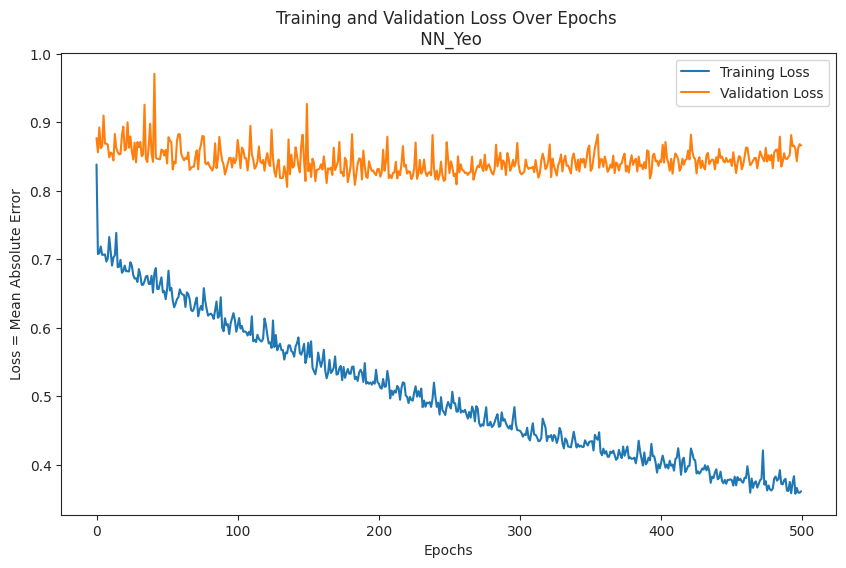

In [ ]:
losses = pd.DataFrame(model.history.history)
plt.figure(figsize=(10, 6))
plt.plot(losses['loss'], label='Training Loss')
plt.plot(losses['val_loss'], label='Validation Loss')
plt.title(f'Training and Validation Loss Over Epochs \n {model_name}')
plt.xlabel('Epochs')
plt.ylabel('Loss = Mean Absolute Error')
plt.legend()
plt.savefig(f'{path_to_save}{model_name}_loss_epochs.png', dpi=300)

In [ ]:
losses.to_csv(f'{path_to_save}{model_name}_loss_epochs.csv')

In [18]:
# Load the initial model from the file
epochs_n =100
model = load_model(f'{path_to_save}{model_name}_epochs_{epochs_n}')

In [19]:
# define epoch_n for the final model
epochs_n = 200

# Fit the model with scaled target
model.fit(X_train_scaled_MnMx, y_train, batch_size=batch_size_n, epochs=epochs_n, verbose=0)
# Saving the model trained with the new epochs_n
model.save(f'{path_to_save}{model_name}_epochs_{epochs_n}', save_format='tf')
# Load the model from the file
model_NN_02 = load_model(f'{path_to_save}{model_name}_epochs_{epochs_n}')

219/219 [==============================] - 0s 1ms/step
0.7085,
0.8892,
1.2691,
0.7893,
0.8529,
0.5046,
1.2697


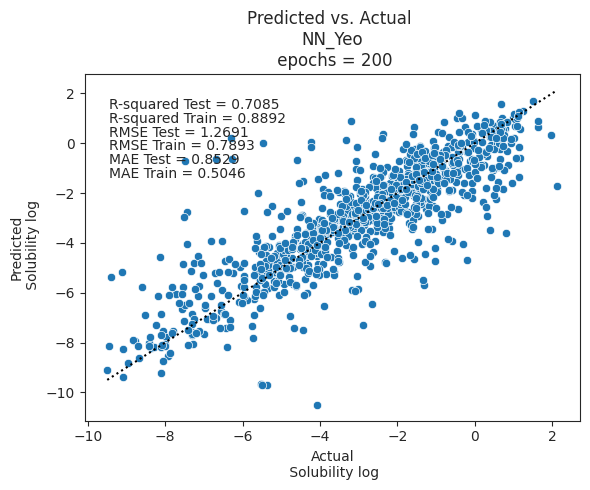

In [20]:
model = model_NN_02
x_axis_label = 'Actual\n Solubility log'
y_axis_label = 'Predicted\n Solubility log'
path_to_save= '/content/drive/MyDrive/01_NN_SAVED/'

pred_plot(model, X_test_scaled_MnMx, X_train_scaled_MnMx,
              y_test, y_train, y_axis_label, x_axis_label, model_name, epochs_n,
              path_to_save)